In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
pred = np.load("./prediction.npy")

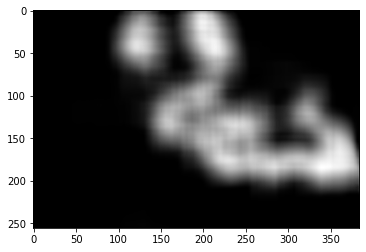

In [16]:
plt.imshow(pred, "gray")
plt.imsave("./pred", pred, format='png', cmap='gray')